In [177]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [178]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [179]:
## 1. Data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
x = torch.arange(start, end, step).unsqueeze(1)
y = weight * x + bias

In [180]:
train_split = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)
len(x_train), len(y_train), len(x_test), len(y_test)

(80, 80, 20, 20)

In [181]:
def plot_predictions(train_data=x_train.cpu(),
                     train_labels=y_train.cpu(),
                     test_data=x_test.cpu(),
                     test_labels=y_test.cpu(),
                     predictions=None):
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    # Plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data")
    # Plot the predictions in red if they are provided
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
    # Show the legend
    plt.legend()



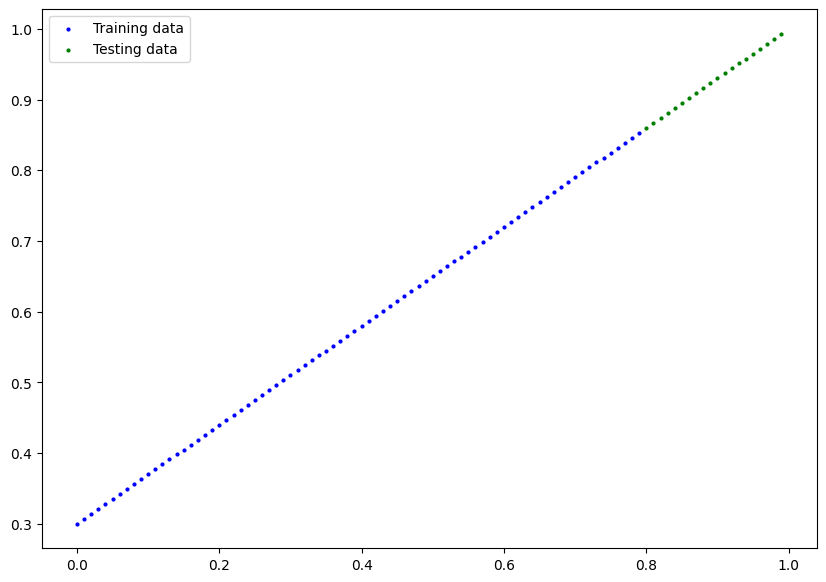

In [182]:
plot_predictions()

In [183]:
## 2. Linear regression model from scratch
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1), requires_grad=True) # default: requires_grad=True anyway
        self.bias = nn.Parameter(torch.randn(1), requires_grad=True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias

In [184]:
model = LinearRegressionModel()
model.to('cuda')
model.state_dict(), next(model.parameters()).device

(OrderedDict([('weight', tensor([-0.3171], device='cuda:0')),
              ('bias', tensor([-1.0815], device='cuda:0'))]),
 device(type='cuda', index=0))

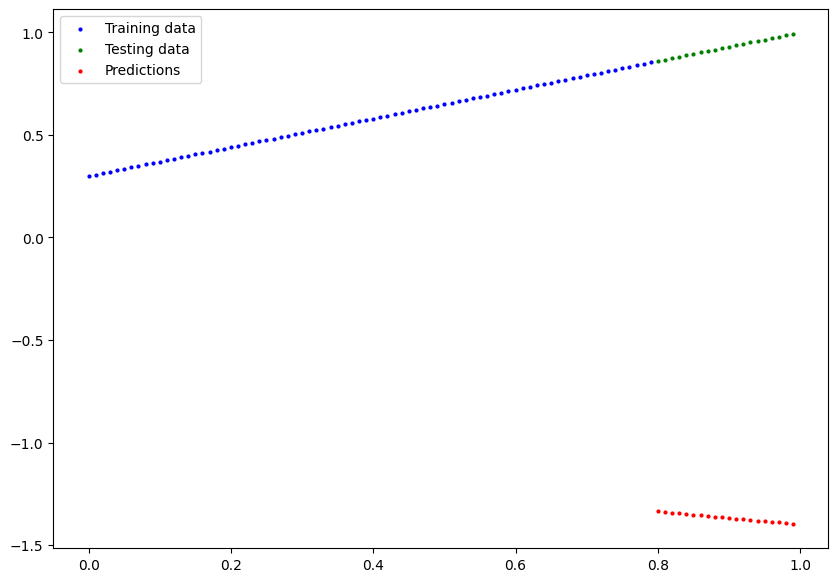

In [185]:
## 3. Predictions with untrained model
with torch.inference_mode(): # disable gradient calculation
    predictions = model(x_test)
    
  
plot_predictions(predictions=predictions.cpu().numpy())

In [186]:
## 4. Training
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
# model = torch.compile(model)

In [187]:
%%time
## 5. Training loop
epochs = 1000
for epoch in range(epochs):
    # Training mode
    model.train()
    
    # Forward pass
    train_predictions = model(x_train)
    
    # Calculate loss
    train_loss = loss_fn(train_predictions, y_train)
    #print(f"Epoch: {epoch + 1} | Loss: {train_loss.item():.4f}")
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Backward propagation
    train_loss.backward()
    
    # Update model parameters
    optimizer.step()
    
    # Evaluation mode
    model.eval()
    with torch.inference_mode():
        test_predictions = model(x_test)
        test_loss = loss_fn(test_predictions, y_test)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Testing Loss: {test_loss.item():.4f}")
            print(model.state_dict())


Epoch: 0 | Testing Loss: 2.2729
OrderedDict([('weight', tensor([-0.3071], device='cuda:0')), ('bias', tensor([-1.0715], device='cuda:0'))])
Epoch: 100 | Testing Loss: 0.3779
OrderedDict([('weight', tensor([0.6929], device='cuda:0')), ('bias', tensor([-0.0715], device='cuda:0'))])
Epoch: 200 | Testing Loss: 0.0013
OrderedDict([('weight', tensor([0.6988], device='cuda:0')), ('bias', tensor([0.2998], device='cuda:0'))])
Epoch: 300 | Testing Loss: 0.0043
OrderedDict([('weight', tensor([0.7021], device='cuda:0')), ('bias', tensor([0.3024], device='cuda:0'))])
Epoch: 400 | Testing Loss: 0.0008
OrderedDict([('weight', tensor([0.7008], device='cuda:0')), ('bias', tensor([0.3001], device='cuda:0'))])
Epoch: 500 | Testing Loss: 0.0008
OrderedDict([('weight', tensor([0.7007], device='cuda:0')), ('bias', tensor([0.3001], device='cuda:0'))])
Epoch: 600 | Testing Loss: 0.0010
OrderedDict([('weight', tensor([0.7007], device='cuda:0')), ('bias', tensor([0.3003], device='cuda:0'))])
Epoch: 700 | Testin

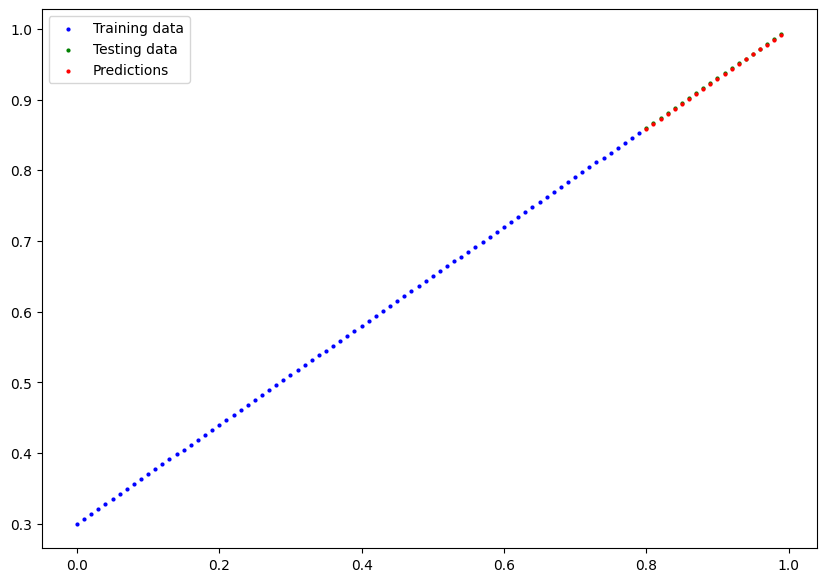

In [188]:
with torch.inference_mode(): # disable gradient calculation
    predictions_new = model(x_test)
    
plot_predictions(predictions=predictions_new.cpu().detach())

In [189]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)


In [197]:
model_2 = LinearRegressionModel()
model_2.to('cuda')
# model_2 = torch.compile(model_2)
model_2.state_dict()
loss_fn = nn.L1Loss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.01)

In [199]:
%%time
## 5. Training loop
epochs = 1000
for epoch in range(epochs):
    # Training mode
    model_2.train()
    
    # Forward pass
    train_predictions = model_2(x_train)
    
    # Calculate loss
    train_loss = loss_fn(train_predictions, y_train)
    #print(f"Epoch: {epoch + 1} | Loss: {train_loss.item():.4f}")
    
    # Optimizer zero grad
    optimizer.zero_grad()
    
    # Backward propagation
    train_loss.backward()
    
    # Update model parameters
    optimizer.step()
    
    # Evaluation mode
    model_2.eval()
    with torch.inference_mode():
        test_predictions = model_2(x_test)
        test_loss = loss_fn(test_predictions, y_test)
        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Testing Loss: {test_loss.item():.4f}")
            print(model_2.state_dict())


Epoch: 0 | Testing Loss: 0.0001
OrderedDict([('weight', tensor([0.7013], device='cuda:0')), ('bias', tensor([0.2988], device='cuda:0'))])
Epoch: 100 | Testing Loss: 0.0004
OrderedDict([('weight', tensor([0.7011], device='cuda:0')), ('bias', tensor([0.2986], device='cuda:0'))])
Epoch: 200 | Testing Loss: 0.0039
OrderedDict([('weight', tensor([0.7034], device='cuda:0')), ('bias', tensor([0.3009], device='cuda:0'))])
Epoch: 300 | Testing Loss: 0.0001
OrderedDict([('weight', tensor([0.7014], device='cuda:0')), ('bias', tensor([0.2988], device='cuda:0'))])
Epoch: 400 | Testing Loss: 0.0004
OrderedDict([('weight', tensor([0.7011], device='cuda:0')), ('bias', tensor([0.2986], device='cuda:0'))])
Epoch: 500 | Testing Loss: 0.0039
OrderedDict([('weight', tensor([0.7034], device='cuda:0')), ('bias', tensor([0.3009], device='cuda:0'))])
Epoch: 600 | Testing Loss: 0.0001
OrderedDict([('weight', tensor([0.7014], device='cuda:0')), ('bias', tensor([0.2988], device='cuda:0'))])
Epoch: 700 | Testing L